In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
# path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'NanumGothic'

#마이너스가 깨질 것을 방지
plt.rcParams['axes.unicode_minus'] = False

NanumGothic


# 음식 list, 대분류 dic

In [44]:
big_list = os.listdir('./data/final/')
small_dic = {}
count = 0
for i in big_list:
    for j in os.listdir(f'./data/final/{i}'):
        small_dic[j] = i

print(len(small_dic))

food_list = list(small_dic.keys())
food_list

30


['가지구이',
 '갈비구이',
 '고등어구이',
 '닭갈비',
 '삼겹살구이',
 '떡국',
 '만두국',
 '양념치킨',
 '후라이드치킨',
 '경단',
 '냉면',
 '김밥',
 '김치볶음밥',
 '비빔밥',
 '새우볶음밥',
 '오므라이스',
 '카레라이스',
 '쭈꾸미볶음',
 '보쌈',
 '게장',
 '고추장아찌',
 '마늘장아찌',
 '달걀말이',
 '달걀후라이',
 '김치찌개',
 '부대찌개',
 '닭찜',
 '삼계탕',
 '감자튀김',
 '새우튀김']

In [4]:
ori_list = ['시금치나물', '애호박볶음', '유부초밥', '감자채볶음', '건새우볶음', '고추장진미채볶음',
            '두부김치', '소세지볶음', '제육볶음', '생선전', '장조림']

add_list = list(set(food_list) - set(ori_list))
add_list

['새우볶음밥',
 '보쌈',
 '양념치킨',
 '닭갈비',
 '김밥',
 '갈비구이',
 '후라이드치킨',
 '김치볶음밥',
 '경단',
 '달걀말이',
 '비빔밥',
 '삼겹살구이',
 '고등어구이',
 '쭈꾸미볶음',
 '냉면']

# Bounding Box 그리기 (건강관리 이미지)
- 현재 이 데이터에 존재하는 annotation은 YOLO format을 따르고 있음
- Bounding box를 그리기 위해 coco format으로 변경 후 그려준다.

In [10]:
i = '김밥'

image_path = f'./data/final/{small_dic[i]}/{i}/image/'
# label_path = f'./data/final/{small_dic[i]}/{i}/label/'
label_path = f'./data/건강관리이미지/final_label/{i}/'
random_imagepath = np.random.choice(os.listdir(image_path))

with open(f'{label_path}{random_imagepath[:-4]}.json', "r") as f:
    file = json.load(f)[0]
file

{'Code Name': 'B010604XX_11594.jpg',
 'Name': 'gimbab',
 'W': '0.427777777777778',
 'H': '0.534979423868313',
 'File Format': 'jpg',
 'Cat 1': '01',
 'Cat 2': '06',
 'Cat 3': '04',
 'Cat 4': 'xx',
 'Annotation Type': 'binding',
 'Point(x,y)': '0.686111111111111,0.430452674897119',
 'Label': '0',
 'Serving Size': 'xx',
 'Camera Angle': 'xx',
 'Cardinal Angle': 'xx',
 'Color of Container': 'xx',
 'Material of Container': 'xx',
 'Illuminance': 'xx'}

In [11]:
random_imagepath

'B010604XX_11594.jpg'

In [12]:
x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

y_width = float(file['W'])
y_height = float(file['H'])

coco_width = y_width * image_input.shape[1]
coco_height = y_height * image_input.shape[0]
print(coco_width, coco_height)

coco_x = x_center - (coco_width / 2)
coco_y = y_center - (coco_height / 2)

print(coco_x, coco_y)

NameError: name 'image_input' is not defined

image_name ::  B010604XX_11594.jpg
693.0000000000003 1300.0000000000005
764.9999999999995 395.9999999999991


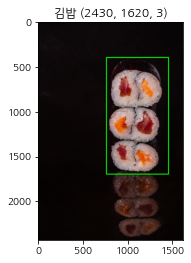

In [13]:
image_name = file['Code Name']
print('image_name :: ',image_name)

#이미지 그리기

filePath = image_path + image_name
stream = open(filePath.encode("utf-8") , "rb") 
bytes = bytearray(stream.read()) 
numpyArray = np.asarray(bytes, dtype=np.uint8) 
image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

#Bounding Box 그리기
x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

y_width = float(file['W'])
y_height = float(file['H'])

coco_width = y_width * image_input.shape[1]
coco_height = y_height * image_input.shape[0]
print(coco_width, coco_height)

coco_x = x_center - (coco_width / 2)
coco_y = y_center - (coco_height / 2)

print(coco_x, coco_y)


cv2.rectangle(image_input, (int(coco_x), int(coco_y)), (int(coco_x+coco_width), int(coco_y+coco_height)),(0,255,0), 10) 


plt.title(f'{i} {image_input.shape}')
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

In [45]:
all_list = ['갈비구이','고등어구이','닭갈비','삼겹살구이','양념치킨','후라이드치킨','경단','냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','쭈꾸미볶음','보쌈','달걀말이','달걀후라이','김치찌개','닭찜','삼계탕','새우튀김',
           '가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
small_dic['삼겹살구이'] = '구이'
small_dic['냉면'] = '면'
small_dic['달걀말이'] = '전'
small_dic['달걀후라이'] = '전'
small_dic['닭찜'] = '찜'
small_dic['쭈꾸미볶음'] = '볶음'

image_name ::  B080202XX_00746.jpg
image_name ::  B080105XX_01631.jpg
image_name ::  B100510XX_12480.jpg
image_name ::  B080249XX_11337.jpg
image_name ::  B120227XX_00468.jpg
image_name ::  B120239XX_00651.jpg
image_name ::  A240228XX_00946.jpg
image_name ::  B030301XX_11332.jpg
image_name ::  B010604XX_11434.jpg
image_name ::  B010407XX_11326.jpg
image_name ::  B010316XX_10242.jpg
image_name ::  B010451XX_00883.jpg
image_name ::  B100409_10141.jpg
image_name ::  B070220XX_11208.jpg
image_name ::  B090316_50933.jpg
image_name ::  B090319XX_02812.jpg
image_name ::  B060103XX_11089.jpg
image_name ::  B070204XX_11247.jpg
image_name ::  B050318XX_11565.jpg
image_name ::  B120116XX_02126.jpg
image_name ::  B080302XX_00485.jpg
image_name ::  B011003XX_01507.jpg
image_name ::  B010533XX_10043.jpg
image_name ::  B120303XX_01209.jpg
image_name ::  B170102XX_10315.jpg
image_name ::  B170110XX_11559.jpg
image_name ::  B060512XX_10906.jpg
image_name ::  B031204XX_10772.jpg
image_name ::  B031113XX

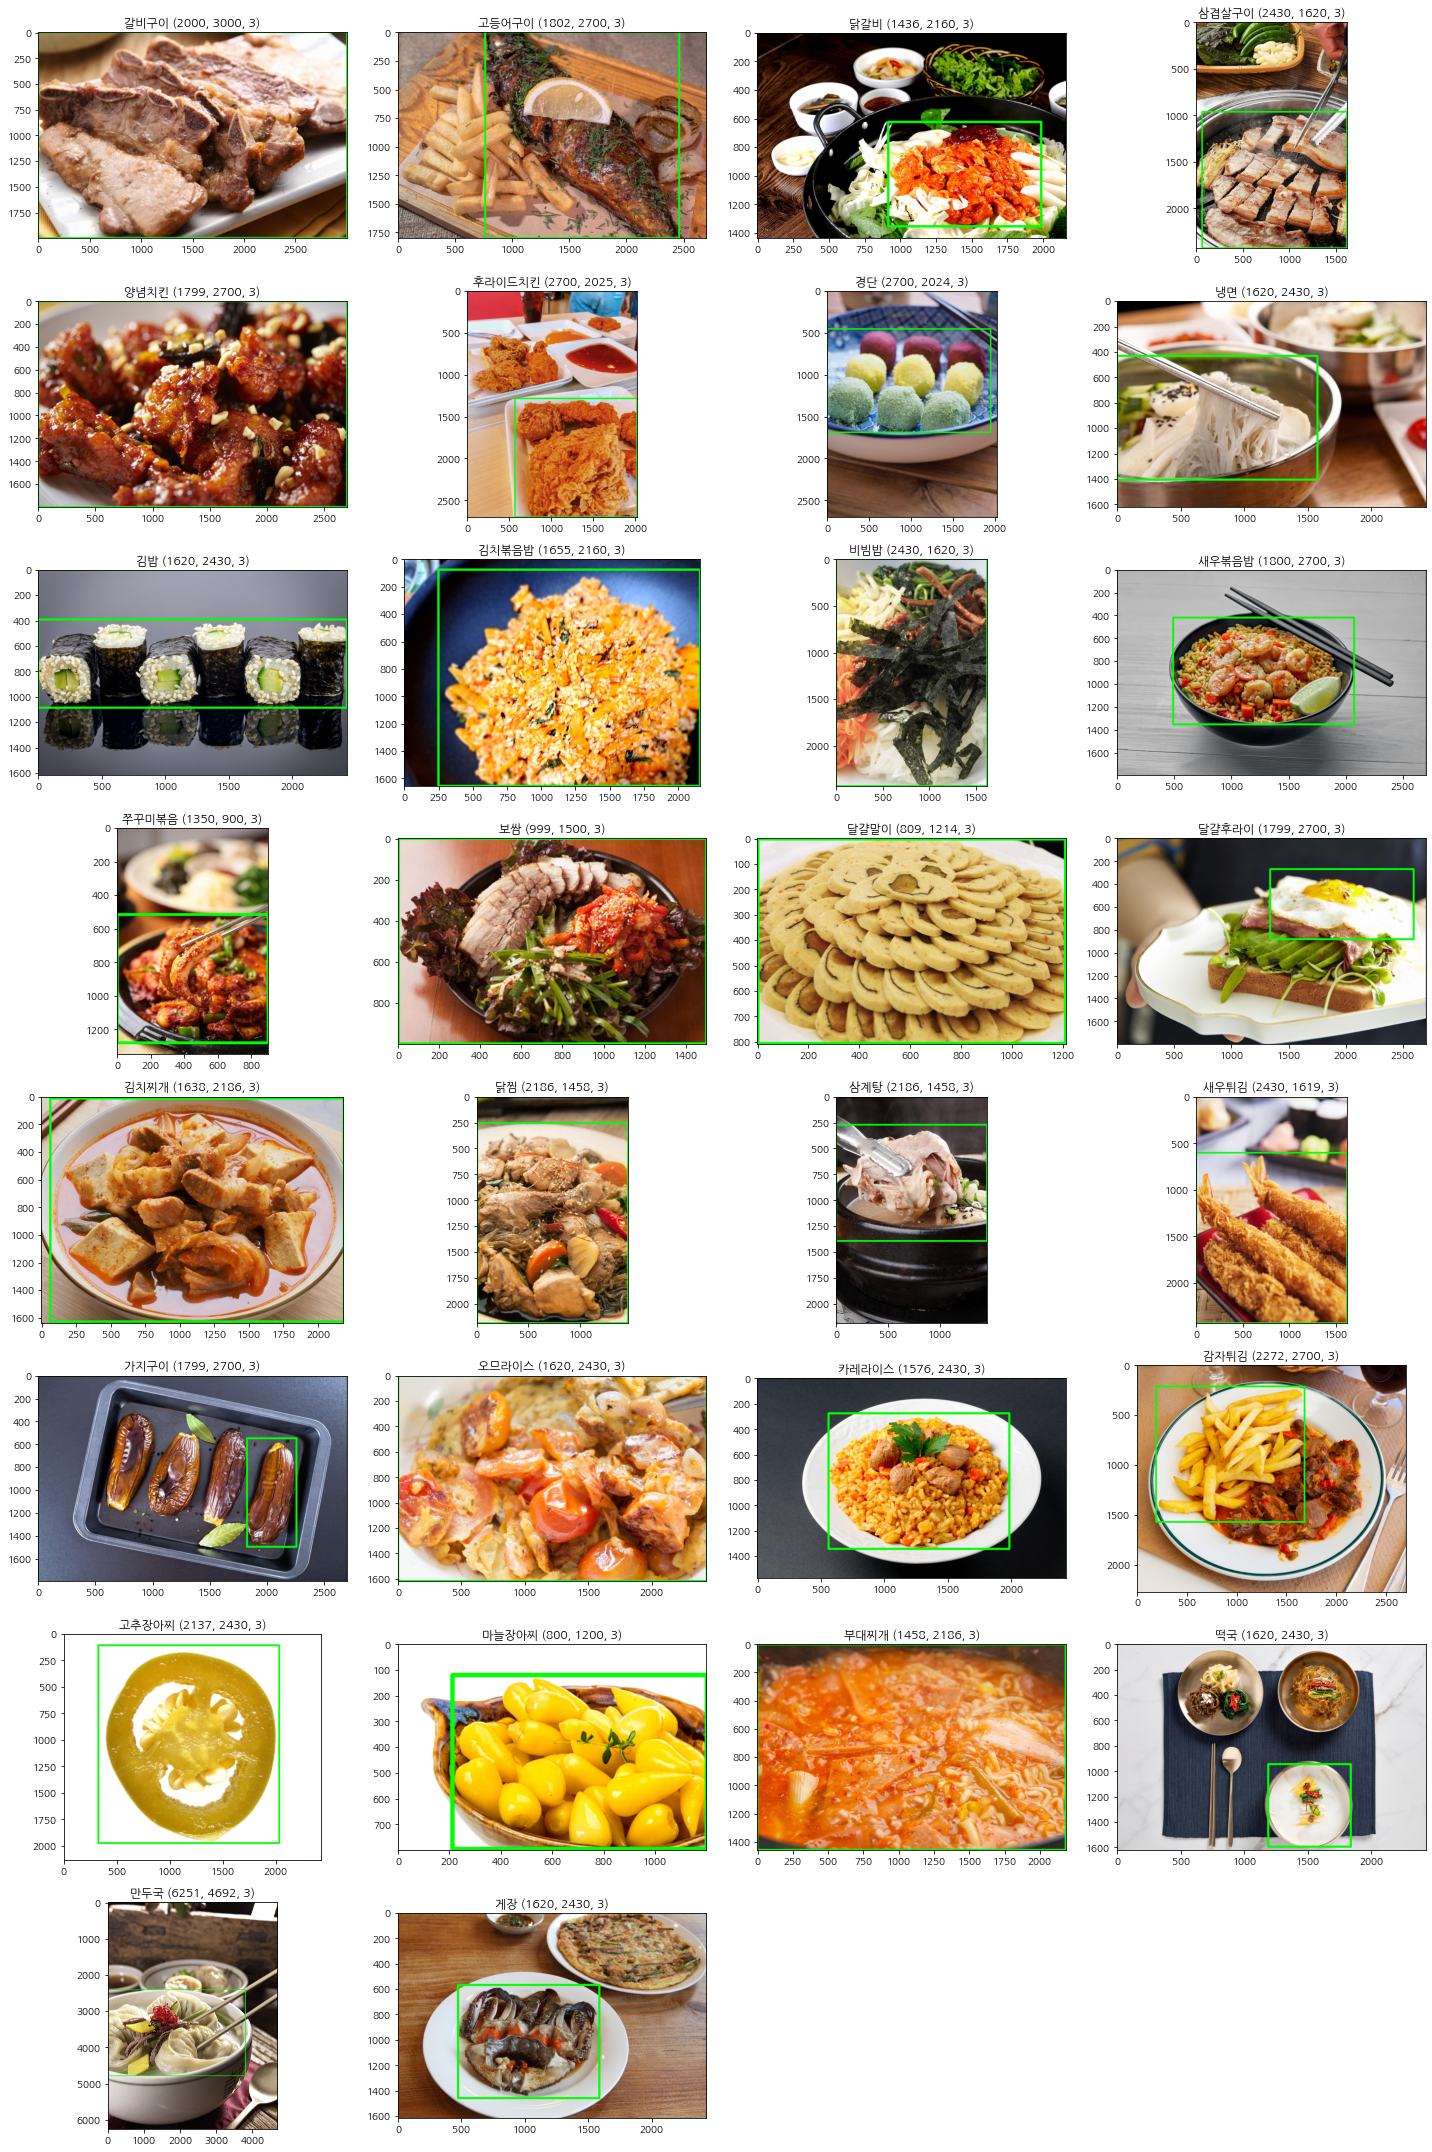

In [57]:
plt.figure(figsize = (20,30))
idx = 0

for i in all_list:
    plt.subplot(8,4,1+idx)
    image_path = f'./data/final/{small_dic[i]}/{i}/image/'
    label_path = f'./data/final/{small_dic[i]}/{i}/label/'
#     label_path = f'./data/건강관리이미지/final_label/{i}/'
    random_imagepath = np.random.choice(os.listdir(image_path))
    with open(f'{label_path}{random_imagepath[:-4]}.json', "r") as f:
        file = json.load(f)[0]
        
    image_name = file['Code Name']
    print('image_name :: ',image_name)

    #이미지 그리기

    filePath = image_path + image_name
    stream = open(filePath.encode("utf-8") , "rb") 
    bytes = bytearray(stream.read()) 
    numpyArray = np.asarray(bytes, dtype=np.uint8) 
    image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

    #Bounding Box 그리기
    x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
    y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

    y_width = float(file['W'])
    y_height = float(file['H'])

    coco_width = y_width * image_input.shape[1]
    coco_height = y_height * image_input.shape[0]
#     print(coco_width, coco_height)

    coco_x = x_center - (coco_width / 2)
    coco_y = y_center - (coco_height / 2)

#     print(coco_x, coco_y)

    cv2.rectangle(image_input, (int(coco_x), int(coco_y)), (int(coco_x+coco_width), int(coco_y+coco_height)),(0,255,0), 15) 


    plt.title(f'{i} {image_input.shape}')
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    idx+=1

plt.tight_layout()

In [90]:
for i in all_list:
    image_path = f'./data/final/{small_dic[i]}/{i}/image/'
    label_path = f'./data/final/{small_dic[i]}/{i}/label/'
    images = list(map(lambda x:x[:-4], os.listdir(image_path)))
    labels = list(map(lambda x:x[:-5], os.listdir(label_path)))
    print(i)
    print(len(images), len(labels))
    print(set(images) - set(labels))
    print(set(labels) - set(images))
    print('------------------------------------------------------')

갈비구이
1100 1100
set()
set()
------------------------------------------------------
고등어구이
1100 1100
set()
set()
------------------------------------------------------
닭갈비
1099 1099
set()
set()
------------------------------------------------------
삼겹살구이
1100 1100
set()
set()
------------------------------------------------------
양념치킨
1100 1100
set()
set()
------------------------------------------------------
후라이드치킨
1100 1100
set()
set()
------------------------------------------------------
경단
1100 1100
set()
set()
------------------------------------------------------
냉면
1100 1100
set()
set()
------------------------------------------------------
김밥
1100 1100
set()
set()
------------------------------------------------------
김치볶음밥
1100 1100
set()
set()
------------------------------------------------------
비빔밥
1100 1100
set()
set()
------------------------------------------------------
새우볶음밥
1100 1100
set()
set()
------------------------------------------------------
쭈꾸미볶음
1100 1100
se